<a href="https://colab.research.google.com/github/venkatkp50/11Dec2021PythonDep/blob/main/Copy_of_Siamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import backends

import tensorflow as tf
from zipfile import ZipFile
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Input,Lambda
from tensorflow.keras import backend as K
from IPython.core.pylabtools import activate_matplotlib
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/drive/')

Mounted at /drive/


In [ ]:
project_path = '/drive/my-drive/siamese/'
training_zip_path = '/drive/my-drive/siamese/images_background-1.zip'
validation_zip_path = '/drive/my-drive/siamese/images_evaluation-1.zip'

In [ ]:
with ZipFile('images_background-1.zip','r') as z:
  z.extractall()

with ZipFile('images_evaluation-1.zip','r') as z:
  z.extractall()

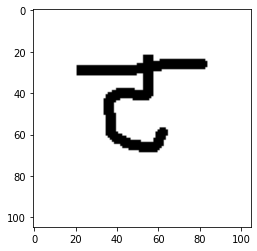

In [ ]:
img = cv2.imread('images_background/Sanskrit/character11/0861_05.png')
flattened_img = img.flatten()
plt.imshow(img)

Each image in the data set has a same of (105, 105, 3)
The number of features in any image from the data set are: 33075


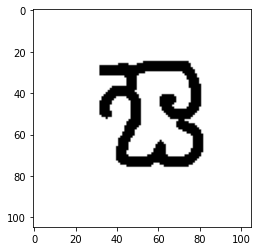

In [ ]:
img = cv2.imread('images_evaluation/Kannada/character11/1215_05.png')
print("Each image in the data set has a same of {0}".format(img.shape))
flattened_img = img.flatten()
print("The number of features in any image from the data set are: {0}".format(flattened_img.shape[0]))
plt.imshow(img)

In [ ]:
K.set_image_data_format('channels_last')

def get_siamese_model(input_shape):
  left_input = Input(input_shape)
  right_input = Input(input_shape)
  model = Sequential()
  model.add(Conv2D(64,(10,10),activation='relu',input_shape=input_shape))
  model.add(MaxPooling2D())
  model.add(Conv2D(128,(7,7),activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(128,(4,4),activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(256,(4,4),activation='relu'))
  model.add(Flatten())
  model.add(Dense(4096,activation='sigmoid'))
  encoded_l = model(left_input)
  encoded_r = model(right_input)
  L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
  L1_distance = L1_layer([encoded_l, encoded_r])
  prediction = Dense(1,activation='sigmoid')(L1_distance)
  siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
  return siamese_net

In [ ]:
model = get_siamese_model((105,105,1))
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 105, 105, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_20 (InputLayer)          [(None, 105, 105, 1  0           []                               
                                )]                                                                
                                                                                                  
 sequential_5 (Sequential)      (None, 4096)         38947648    ['input_19[0][0]',               
                                                                  'input_20[0][0]']         

In [ ]:
optimizer = Adam(learning_rate=0.006)
model.compile(optimizer=optimizer,loss='binary_crossentropy')

In [ ]:
import os
os.listdir()

['.config',
 'images_background-1.zip',
 'images_evaluation-1.zip',
 'images_background',
 'images_evaluation',
 'sample_data']

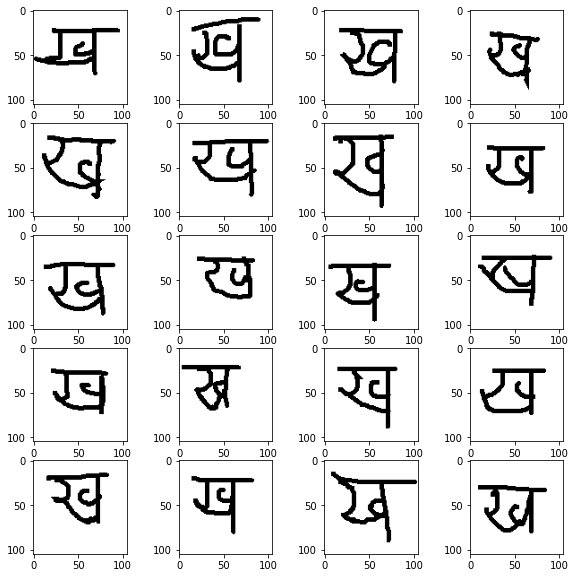

In [ ]:
image_list  = []
f, axarr = plt.subplots(5,4, figsize=(10,10))
path = 'images_background/Sanskrit/character02/'

for image in os.listdir(path):
  image_path = os.path.join(path, image)
  img = cv2.imread(image_path)
  image_list.append(img)
for i in range(5):
  for j in range(4):
    axarr[i,j].imshow(image_list.pop())



In [ ]:
import pickle

with open(os.path.join( "train.pickle"), "rb") as f:
    (X, classes) = pickle.load(f)

with open(os.path.join(project_path, "val.pickle"), "rb") as f:
    (Xval, val_classes) = pickle.load(f)
    
print("Training alphabets: \n")
print(len(list(classes.keys())))
print("Validation alphabets:", end="\n\n")
print(list(val_classes.keys()))
print(Xval.shape)

FileNotFoundError: ignored